In [3]:
import astropy.io
from astropy.io import fits
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.optimize as opt
from scipy.optimize import curve_fit
from itertools import islice


In [47]:
target1 = pd.read_csv('J020022.01-084512.0.csv')
#abflux = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * target1.Mag)+22.4328)
opflux = 10**(23-(target1.Mag +48.6)/2.5)
opflux_err = 10**(23-(target1.Mag + target1.Magerr +48.6)/2.5) - 10**(23-(target1.Mag +48.6)/2.5)
#opflux_err = (3631 * 3.6 * 10**(-10) * np.sinh(-0.92103 * (target1.Mag + target1.Magerr)+22.4328)) - (3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * target1.Mag)+22.4328))                

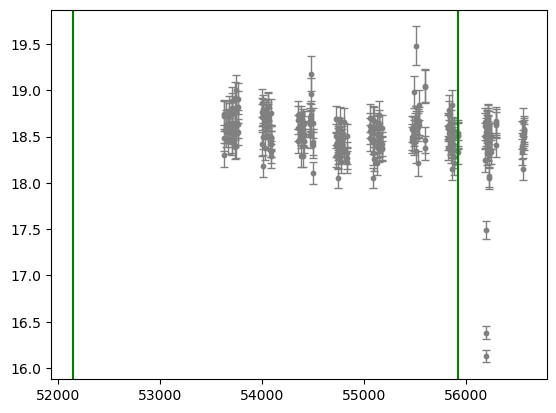

In [5]:
plt.scatter(target1.MJD,target1.Mag, s = 10, color = 'gray')
plt.errorbar(target1.MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray')
plt.axvline(x= 52149 , color ='g')	
plt.axvline(x= 55921 , color ='g')	

In [6]:
sorted_MJD =sorted(target1.MJD)
len(sorted_MJD)

257

In [7]:
diff = []
for i in range(0,len(sorted_MJD)-1):
    diff.append(sorted_MJD[i+1] -sorted_MJD[i])
diff

[0.008139999998093117,
 0.008150000001478475,
 0.00811999999859836,
 24.98967999999877,
 0.006410000001778826,
 0.006420000005164184,
 0.0064099999945028685,
 15.945130000000063,
 0.00864000000001397,
 0.008659999999508727,
 0.008900000000721775,
 9.949680000005173,
 0.0064099999945028685,
 0.006400000005669426,
 0.006419999997888226,
 26.926390000000538,
 0.008580000001529697,
 0.008589999997639097,
 0.008629999996628612,
 5.899490000003425,
 0.005909999999857973,
 0.005909999999857973,
 0.005899999996472616,
 22.931820000005246,
 0.00938999999925727,
 0.009209999996528495,
 0.009200000000419095,
 8.990250000002561,
 0.008479999996779952,
 0.008460000004561152,
 0.008479999996779952,
 24.95072000000073,
 0.00480000000243308,
 0.00480999999854248,
 0.004820000001927838,
 236.25450999999885,
 0.0073999999949592166,
 0.007340000003750902,
 0.007369999999355059,
 8.949639999998908,
 0.005310000000463333,
 0.0053200000038486905,
 0.0054099999979371205,
 16.914389999998093,
 0.0097400000013

In [8]:
sum = 0
seppt = []
for j in range (0,len(diff)):
    if diff[j] >100:
        sum += 1
        seppt.append(j)
print(sum)
seppt

8


[35, 67, 99, 131, 159, 185, 213, 245]

In [9]:
slice_length = []
slice_length.append(seppt[0]+1)

for i in range(0,len(seppt)-1):
    slice_length.append(seppt[i+1]-seppt[i])
slice_length.append(len(sorted_MJD)-seppt[-1])
slice_length

[36, 32, 32, 32, 28, 26, 28, 32, 12]

In [10]:
Input = iter(sorted_MJD)
grouped_MJD =  [list(islice(Input, elem)) for elem in slice_length] 

In [11]:
data = target1.sort_values('MJD')
target1.sort_values('MJD')

,InputID,ID,Mag,Magerr,RA,Decl,MJD,Blend
24,J020022.01-084512.0,1009011045911,18.74,0.16,30.09170,-8.75345,53626.33268,0
25,J020022.01-084512.0,1009011045911,18.30,0.13,30.09169,-8.75355,53626.34082,0
26,J020022.01-084512.0,1009011045911,18.49,0.14,30.09177,-8.75328,53626.34897,0
27,J020022.01-084512.0,1009011045911,18.72,0.16,30.09159,-8.75343,53626.35709,0
16,J020022.01-084512.0,1009011045911,18.63,0.16,30.09163,-8.75327,53651.34677,0
...,...,...,...,...,...,...,...,...
252,J020022.01-084512.0,1009011045911,18.44,0.13,30.09168,-8.75319,56565.44758,0
253,J020022.01-084512.0,1009011045911,18.58,0.14,30.09167,-8.75318,56574.35983,0
254,J020022.01-084512.0,1009011045911,18.54,0.14,30.09165,-8.75336,56574.36762,0
255,J020022.01-084512.0,1009011045911,18.56,0.14,30.09165,-8.75312,56574.37541,0


In [12]:
df_1 = data.iloc[:seppt[0],:]
df_1.to_csv('Group1.csv', index=False)
#print(df_1)
grouped_MJD[0][-1]

53767.11609

In [13]:
df_2 = data.iloc[seppt[0]+1:seppt[1],:]
#print(df_2)
df_2.to_csv('Group2.csv', index=False)
grouped_MJD[1][-1]

54091.17868

In [14]:
df_3 = data.iloc[seppt[1]+1:seppt[2],:]
#print(df_3)
df_3.to_csv('Group3.csv', index=False)
grouped_MJD[2][-1]

54505.10077

In [15]:
df_4 = data.iloc[seppt[2]+1:seppt[3],:]
#print(df_4)
df_4.to_csv('Group4.csv', index=False)
grouped_MJD[3][-1]

54831.17683

In [16]:
df_5 = data.iloc[seppt[3]+1:seppt[4],:]
#print(df_5)
df_5.to_csv('Group5.csv', index=False)
grouped_MJD[4][-1]

55180.21155

In [17]:
df_6 = data.iloc[seppt[4]+1:seppt[5],:]
#print(df_6)
df_6.to_csv('Group6.csv', index=False)
grouped_MJD[5][-1]

55600.12277

In [18]:
df_7 = data.iloc[seppt[5]+1:seppt[6],:]
#print(df_7)
df_7.to_csv('Group7.csv', index=False)
grouped_MJD[6][-1]

55923.15196

In [19]:
df_8 = data.iloc[seppt[6]+1:seppt[7],:]
#print(df_8)
df_8.to_csv('Group8.csv', index=False)
grouped_MJD[7][-1]

56301.144

In [20]:
df_9 = data.iloc[seppt[7]+1:,:]
#print(df_9)
df_9.to_csv('Group9.csv', index=False)
grouped_MJD[8][-1]

56574.38334

In [21]:
med = []
centerMJD = []
medMJD = []
medopflux = []

g1 = pd.read_csv('group1.csv')
med1 = np.median(g1.Mag)
centerMJD1 = np.mean(g1.MJD)
medMJD1 = np.median(g1.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g1.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)


g2 = pd.read_csv('group2.csv')
med1 = np.median(g2.Mag)
centerMJD1 = np.mean(g2.MJD)
medMJD1 = np.median(g2.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g2.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g3 = pd.read_csv('group3.csv')
med1 = np.median(g3.Mag)
centerMJD1 = np.mean(g3.MJD)
medMJD1 = np.median(g3.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g3.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g4 = pd.read_csv('group4.csv')
med1 = np.median(g4.Mag)
centerMJD1 = np.mean(g4.MJD)
medMJD1 = np.median(g4.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g4.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g5 = pd.read_csv('group5.csv')
med1 = np.median(g5.Mag)
centerMJD1 = np.mean(g5.MJD)
medMJD1 = np.median(g5.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g5.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g6 = pd.read_csv('group6.csv')
med1 = np.median(g6.Mag)
centerMJD1 = np.mean(g6.MJD)
medMJD1 = np.median(g6.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g6.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g7 = pd.read_csv('group7.csv')
med1 = np.median(g7.Mag)
centerMJD1 = np.mean(g7.MJD)
medMJD1 = np.median(g7.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g7.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g8 = pd.read_csv('group8.csv')
med1 = np.median(g8.Mag)
centerMJD1 = np.mean(g8.MJD)
medMJD1 = np.median(g8.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g8.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g9 = pd.read_csv('group9.csv')
med1 = np.median(g9.Mag)
centerMJD1 = np.mean(g9.MJD)
medMJD1 = np.median(g9.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g9.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)



In [22]:
med

[18.63, 18.62, 18.6, 18.42, 18.49, 18.62, 18.5, 18.51, 18.52]

In [23]:
centerMJD

[53695.694160285704,
 54045.96818258064,
 54423.4257064516,
 54771.170131612904,
 55120.03604222223,
 55520.0690136,
 55862.540281851856,
 56224.15832387096,
 56564.035993636375]

In [24]:
medMJD


[53704.24122,
 54039.28152,
 54406.26187,
 54765.2974,
 55125.29669,
 55508.26723,
 55864.24046,
 56215.34014,
 56565.44243]

In [25]:
medopflux


[0.0001275737359559388,
 0.00012875421768169038,
 0.00013114804894832368,
 0.0001547977209067332,
 0.00014513214683204876,
 0.00012875421768169038,
 0.00014380151890067583,
 0.00014248308968461696,
 0.00014117674734122354]

In [26]:
st = 53626
#start of observations

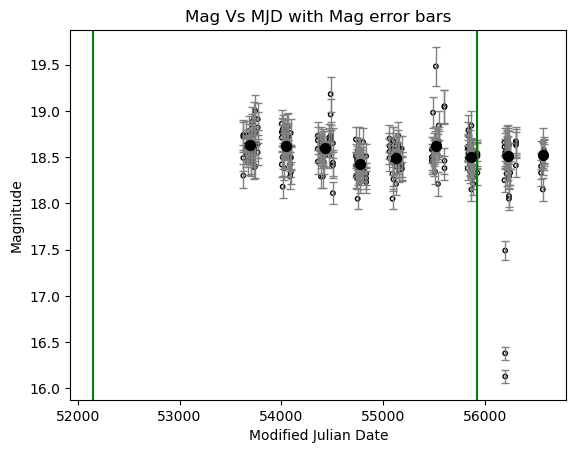

In [28]:
plt.scatter(target1.MJD,target1.Mag , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(centerMJD,med, s =50, color = 'k', zorder =3 )
plt.errorbar(target1.MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Magnitude')
plt.title('Mag Vs MJD with Mag error bars')

plt.axvline(x= 52149 , color ='g')	
plt.axvline(x= 55921 , color ='g')	

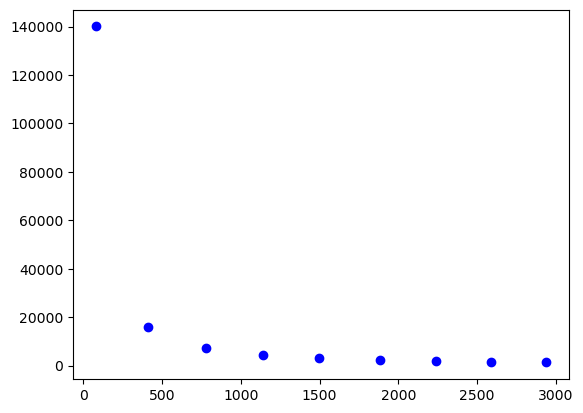

In [29]:
def f(x, a, b, c):
    return a * (x ** b) + c
x = np.array([item - st for item in medMJD])
y = f(x,4.05245427e+07,-1.3, 1.81095672e+01)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


In [76]:
popt3, pcov3 = curve_fit(f, x, med, maxfev =5000)


In [77]:
popt3

array([-3.33626614e+01,  1.07732466e-03,  5.21587623e+01])

In [78]:
pcov3

array([[ 1.12640743e+09,  3.66570793e+04, -1.12643186e+09],
       [ 3.66570793e+04,  1.19294484e+00, -3.66578741e+04],
       [-1.12643186e+09, -3.66578741e+04,  1.12645628e+09]])

In [79]:
 np.sqrt(np.diag(pcov3))

array([3.35619939e+04, 1.09222014e+00, 3.35627216e+04])

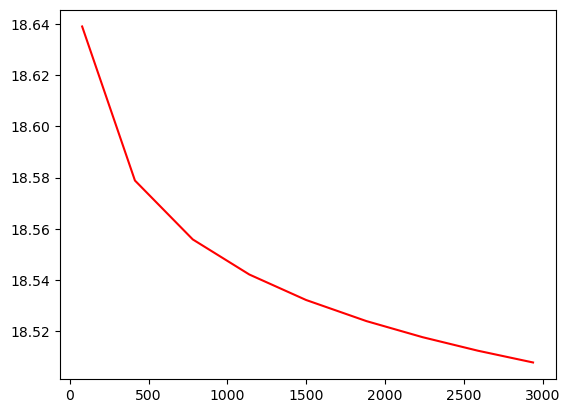

In [80]:
plt.plot(x, f(x,*popt3), 'r-')

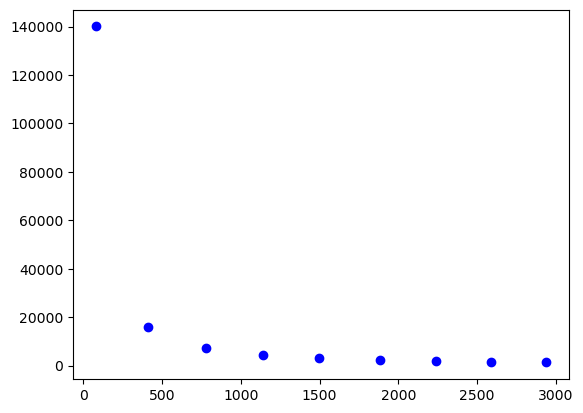

In [81]:
def g(x, a, b):
    return a * (x ** b) + 18
x = np.array([item - st	 for item in medMJD])
y = g(x,4.05245427e+07,-1.3)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


In [82]:
popt4, pcov4 = curve_fit(f, target1.MJD - st	, target1.Mag )

In [83]:
popt4

array([-3.75043029e-04,  8.03447805e-01,  1.86411931e+01])

In [84]:
pcov4

array([[ 3.16394271e-06,  1.02787313e-03, -9.60013931e-05],
       [ 1.02787313e-03,  3.34889122e-01, -3.03491215e-02],
       [-9.60013931e-05, -3.03491215e-02,  3.94306923e-03]])

In [85]:
 np.sqrt(np.diag(pcov4))

array([0.00177875, 0.57869605, 0.06279386])

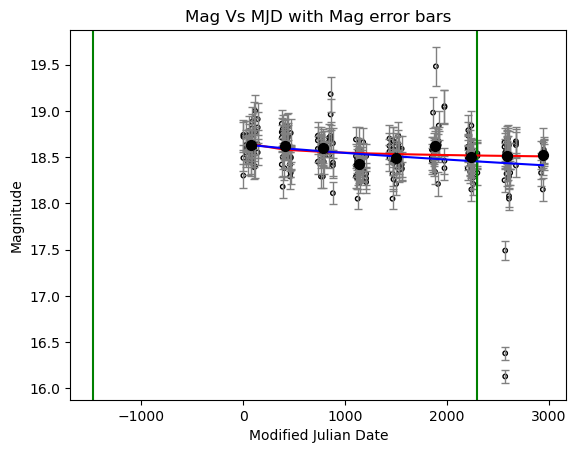

In [86]:
x = np.array([item - st for item in medMJD])
MJD = np.array([item - st for item in target1.MJD])
plt.scatter(MJD,target1.Mag , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(x,med, s =50, color = 'k', zorder =4 )
plt.errorbar(MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Magnitude')
plt.title('Mag Vs MJD with Mag error bars')

plt.axvline(x= 52149 -st, color ='g')	
plt.axvline(x= 55921-st, color ='g')
plt.plot(x, f(x,*popt3), 'r-', zorder=3)
plt.plot(x, f(x,*popt4), 'b-', zorder=3)
#plt.plot(x, g(x, 0.66649567, -0.32796038), 'y-', zorder=3)
#plt.plot(x, g(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'g', zorder=3)



(0.0, 0.0004)

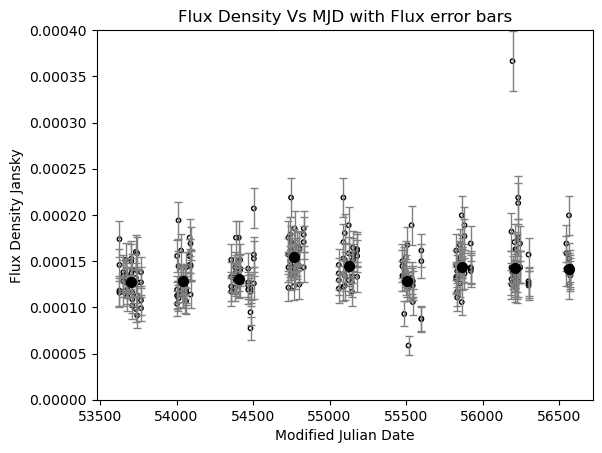

In [64]:
plt.scatter(target1.MJD ,opflux , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
#plt.scatter(target1.MJD ,abflux , s = 10, edgecolors = 'r', facecolors = 'none', zorder = 1)
plt.scatter(medMJD ,medopflux , s =50, color = 'k', zorder =3 )
plt.errorbar(target1.MJD,opflux, yerr = np.absolute(opflux_err), fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Flux Density Jansky')
plt.title('Flux Density Vs MJD with Flux error bars')
plt.ylim(0, 0.0004)

#plt.axvline(x=  , color ='g')	
#plt.axvline(x= , color ='g')

In [70]:
popt2, pcov2 = curve_fit(f, x, medopflux, maxfev =5000)

In [71]:
popt2

array([ 0.00724678,  0.00062089, -0.00713992])

In [72]:
pcov2

array([[ 173.28950232,  -14.8240559 , -173.29073755],
       [ -14.8240559 ,    1.26812448,   14.82416156],
       [-173.29073755,   14.82416156,  173.29197279]])

In [73]:
 np.sqrt(np.diag(pcov2))

array([13.16394706,  1.12611033, 13.1640409 ])

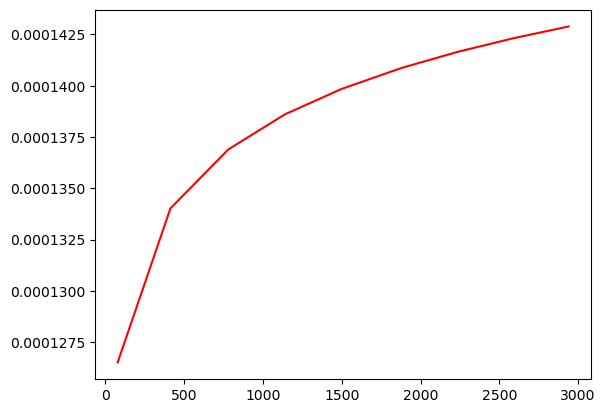

In [74]:
plt.plot(x, f(x,*popt2), 'r-')

In [65]:
popt1, pcov1 = curve_fit(f, target1.MJD - st, opflux, maxfev =5000)

In [66]:
popt1

array([1.40282285e-11, 1.90519626e+00, 1.31562486e-04])

In [67]:
pcov1

array([[ 3.01315397e-20, -2.70047453e-10, -1.47307843e-15],
       [-2.70047453e-10,  2.42201528e+00,  1.29597645e-05],
       [-1.47307843e-15,  1.29597645e-05,  1.38525666e-10]])

In [69]:
 np.sqrt(np.diag(pcov1))

array([1.73584388e-10, 1.55628252e+00, 1.17696927e-05])

In [ ]:
def h(x, a, b):
    return a * (x ** b) + 0.00015
x = np.array([item - st	 for item in medMJD])
y = h(x,4.05245427e+07,-1.3)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


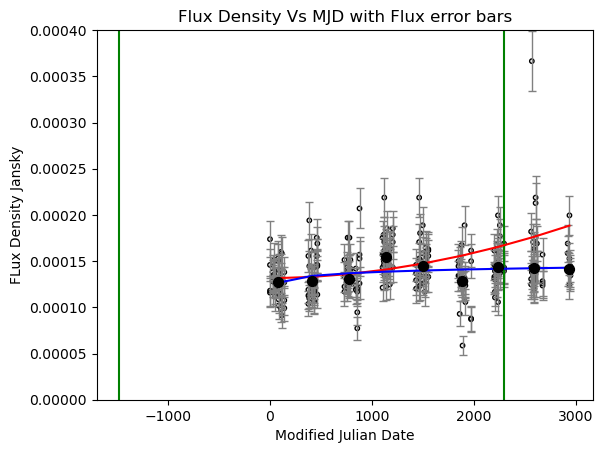

In [75]:
x = np.array([item - st for item in medMJD])
MJD = np.array([item - st for item in target1.MJD])
plt.scatter(MJD,opflux , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(x,medopflux, s =50, color = 'k', zorder =4 )
plt.errorbar(MJD,opflux, yerr =np.absolute(opflux_err), fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('FLux Density Jansky')
plt.title('Flux Density Vs MJD with Flux error bars')
plt.ylim(0, 0.0004)

plt.axvline(x= 52149 -st, color ='g')	
plt.axvline(x= 55921-st, color ='g')
plt.plot(x, f(x, *popt1), 'r-', zorder=3)
plt.plot(x, f(x,*popt2), 'b-', zorder=3)
#plt.plot(x, h(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'b-', zorder=3)
#plt.plot(x, h(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'g-', zorder=3)


In [ ]:
def mase(actual : np.ndarray, predicted : np.ndarray):

    forecast_error = np.mean(np.abs(actual - predicted))
    naive_forecast = np.mean(np.abs(np.diff(actual)))
    mase = forecast_error / naive_forecast

    return mase

In [ ]:
actual = medopflux
predicted1 = func(x,)
predicted2 = func(x,)



In [ ]:
mase(actual,predicted1)

In [ ]:
mase(actual,predicted2)

In [ ]:
resid = opflux - func(x,)
chi2 = sum((resid / func(x,))**2)
chi2_red = chi2 / dof
